Models with less number of features have higher explainability <br>
It is easier to implement machine learning models with reduced features <br>
Fewer features lead to enhanced generalization which in turn reduces overfitting <br>
Feature selection removes data redundancy <br>
Training time of models with fewer features is significantly lower <br>
Models with fewer features are less prone to errors <br>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [24]:
data = pd.read_csv('./data/santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [12]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

## Constant Features Removal

In [14]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [17]:
constant_filter.get_support().sum() # after removing constant features left

290

In [19]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 Fal

In [21]:
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_op_var40_hace3', 'num_var27_0', 'num_var28_0',
       'num_var28', 'num_var27', 'num_var34_0', 'num_var34', 'num_var41',
       'num_var46_0', 'num_var46', 'saldo_var13_medio', 'saldo_var18',
       'saldo_var28', 'saldo_var27', 'saldo_var34', 'saldo_var41',
       'saldo_var46', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_e

In [25]:
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [26]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((16000, 290), (4000, 290), (16000, 370))

### Quasi constant feature removal

In [27]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [28]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [30]:
quasi_constant_filter.get_support().sum()

246

In [33]:
291-246

45

In [34]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

In [36]:
X_train_quasi_filter.shape, X_test_quasi_filter.shape

((16000, 246), (4000, 246))

### Remove Duplicate Features

In [47]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [48]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [50]:
X_train_T.duplicated().sum()

19

In [52]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
241    False
242    False
243    False
244    False
245    False
Length: 246, dtype: bool

In [53]:
features_to_keep = [not index for index in duplicated_features]

In [54]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [55]:
X_train_unique.shape, X_train.shape

((16000, 227), (16000, 370))

In [57]:
370-227

143

## Build ML model and compare the performance of the selected feature

In [58]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [59]:
%%time
run_randomForest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy on test set: 
0.958
CPU times: user 6.38 s, sys: 136 ms, total: 6.51 s
Wall time: 1.21 s


In [61]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.958
CPU times: user 7.7 s, sys: 172 ms, total: 7.87 s
Wall time: 1.37 s


In [62]:
(1.51-1.26)*100/1.51

16.556291390728475

## Feature Selection with Filtering Method- Correlated Feature Removal

In [63]:
corrmat = X_train_unique.corr()

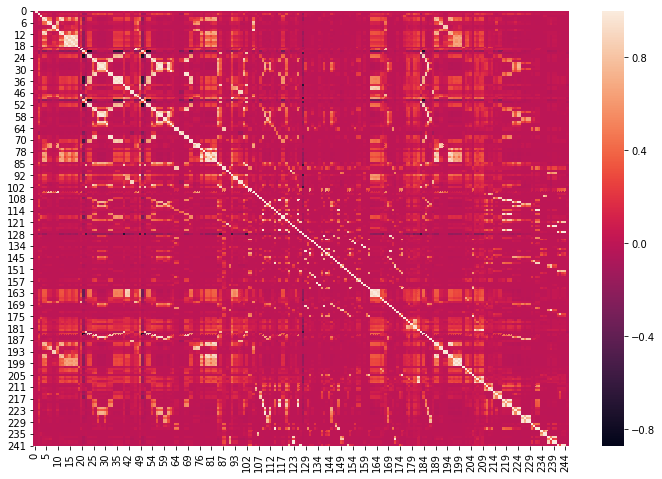

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(corrmat)

In [66]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [67]:
corr_features = get_correlation(X_train_unique, 0.85)
corr_features

{5,
 7,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 76,
 80,
 81,
 83,
 84,
 86,
 88,
 92,
 94,
 96,
 99,
 101,
 102,
 104,
 105,
 112,
 116,
 118,
 122,
 126,
 137,
 139,
 144,
 148,
 155,
 158,
 159,
 162,
 163,
 164,
 165,
 170,
 172,
 181,
 183,
 184,
 185,
 186,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 198,
 199,
 200,
 205,
 206,
 208,
 209,
 213,
 216,
 217,
 218,
 220,
 221,
 222,
 224,
 225,
 228,
 229,
 232,
 233,
 236,
 237,
 238,
 239,
 240,
 241,
 243,
 244}

In [68]:
len(corr_features)

115

In [69]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)

In [70]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 112), (4000, 112))

In [71]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.95825
CPU times: user 3.92 s, sys: 124 ms, total: 4.05 s
Wall time: 883 ms


In [72]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.958
CPU times: user 7.64 s, sys: 195 ms, total: 7.84 s
Wall time: 1.46 s


In [73]:
(1.53-0.912)*100/1.53

40.3921568627451